<a href="https://colab.research.google.com/github/ia-ML/dnnPublicDatasets/blob/main/datasets/iaDNN_PublicDatasets_Carvana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Public Datasets

Public datasets comes with different folder structure, format, and size. I am trying to create standard folder structure and format to make it easy to use these public datasets in machine learning or other tasks. Each Colab Notebook will be dedicated to a dataset.

**Tutorial Objectives**

In this tutorial you will learn how to:
- obtain a public dataset,
- upload it to Colab
- getting some statistics
- show some samples
- process it
- download the final processed dataset.
- create some-how challenging multi-class segmentation dataset.


**Do you have questions, suggestions, corrections, or comments?**

To make the tutorial more useful and interactive, please use the Github [discussion forum](https://github.com/ia-ML/dnnPublicDatasets/discussions) for your comments, suggesitons, corrections and questions.


## Carvana Dataset

![](https://storage.googleapis.com/kaggle-media/competitions/kaggle/3333/media/carvana_graphics.png)

* Cars dataset that contains a car and its mask.
* The dataset can be used for different tasks e.g. image classification, image segmentation, and 3D image construction.
* The dataset is used in kaggle carvana image masking [challenge](https://www.kaggle.com/c/carvana-image-masking-challenge).
* It contains 318 cars, each car has 16 images with different view angles. Total number of training images is 318*16*2=10176 (5088 images and 5088 masks).
* The training has two files train.zip and train_masks.zip
  - train image file name: carID_ViewAngle.jpg
  - train mask file name: carID_ViewAngle_mask.gif
* The image width and height: 1918, 1280 pixels   
  





### Download the dataset
One must download the dataset manually, it is not allowed to share the dataset using another cloud service.

To download the dataset, you need to create a free account at [kaggle](https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2F).

After login to your account:

Download the cars Carvana Dataset files: **train.zip** and **train_masks.zip** from this link [carvana-image-masking-challenge](https://www.kaggle.com/c/carvana-image-masking-challenge/data).


### Upload files to Colab:

Upload the dataset to colab (or process it locally using the python code from this notebook).
   - e.g. Click on Files icon in the left side. Then drag and drop the zip file from your local PC. or click upload button and upload the files
   - The files size is large so it will take around 2-10 minutes to be uploaded. Make sure the size of the files are 424233528 and 30537860 before you start processing.
   - Colab uses virtual machine and provide a temporary space while the machine is running. Everything will be deleted when the machine is restarted or you leave the browser. It is better to save the data in your google drive or somewhere else to use it privatly.


In [1]:
import time
sTm = time.time()

In [2]:
# make sure that the size is correct, if not, wait until the file is uploaded.
#  train_masks.zip  30537860
#        train.zip 424233528
#!rm -r /content/train*.zip

!ls -l
print(time.time()-sTm)

total 552492
drwxr-xr-x 4 root root      4096 Jan 16 12:52 datasetCarvana
-rw-r--r-- 1 root root 110960506 Jan 16 12:59 data.zip
drwxr-xr-x 1 root root      4096 Jan 11 17:02 sample_data
-rw-r--r-- 1 root root  30537860 Jan 16 09:42 train_masks.zip
-rw-r--r-- 1 root root 424233528 Jan 16 10:11 train.zip
0.5106279850006104


### Process the files

#### Extract the data from the zip files

Extract the files into folder datasetCarvana/srcData

In [3]:
import os, sys, time, shutil, csv, json, cv2, zipfile, random
from collections import Counter
from PIL import Image
import numpy as np
from IPython.display import display, clear_output

#!rm /content/train.zip


doUnzip = 0

zipFilenames      = ["train.zip", "train_masks.zip"]
workFolderPath    = "/content"
carvanaFolderPath = workFolderPath +"/datasetCarvana"
srcFolderPath     = os.path.join(carvanaFolderPath,"srcData")


# function to unzip all zip files in the inputFolder and save
#     them in the outputFolder
def extraxtZipFiles(inputFolder,outputFolder, zipFilenames):
    print("Extracting files  ..........")
    for zipFilename in zipFilenames:
        zip_file_path = os.path.join(inputFolder,zipFilename)
        print(zip_file_path)
        # Using 'with' statement to open and extract the ZIP file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(outputFolder)
        zip_ref.close()

if doUnzip:
    # reset and create folders--------------
    folderPaths = [carvanaFolderPath,srcFolderPath]
    for folderPath in folderPaths:
        if os.path.exists(folderPath):
            shutil.rmtree(folderPath)
        os.makedirs(folderPath, exist_ok=True)
        print(f"Folder created: {folderPath}")

    # unzip------------------------
    print("zipFilenames: ", zipFilenames)
    extraxtZipFiles(workFolderPath,srcFolderPath, zipFilenames)
    imgFnms = sorted(os.listdir(os.path.join(srcFolderPath,"train")))
    mskFnms = sorted(os.listdir(os.path.join(srcFolderPath,"train_masks")))
    print("Number of extracted images: ", len(imgFnms))
    print("Number of extracted masks : ", len(mskFnms))

    print("First image filename: ", imgFnms[0])
    print("First mask filename : ", mskFnms[0])

print("done!")

done!


 #### Create One-Folder structure

In [4]:
def processImage(fnm, imgPath,imgOutputPath, newSize):
    img = Image.open(imgPath).convert('RGB')
    # resize-----------------------
    outImg = np.array(img)[:, :, ::-1].copy()
    if not newSize is None:
        outImg =cv2.resize(outImg, newSize)
    #save result
    cv2.imwrite(imgOutputPath, outImg)
print("done!")

done!


In [5]:
def create1FolderStructuredef(inputFolderPath, outputFolderPath,
                           maskKeyword,outputFormat,zipFilenames):
    print("create1FolderStructure starts! ....................")
    !rm -r /content/datasetCarvana/workData/

    imgFnms = sorted(os.listdir(os.path.join(inputFolderPath,zipFilenames[0][:-4])))
    mskFnms = sorted(os.listdir(os.path.join(inputFolderPath,zipFilenames[1][:-4])))

    # create folders--------------
    folderPaths = [outputFolderPath]
    for folderPath in folderPaths:
        if not os.path.exists(folderPath):
           os.makedirs(folderPath)
    # Get filenames
    imgFnms = sorted(os.listdir(os.path.join(inputFolderPath,zipFilenames[0][:-4])))
    mskFnms = sorted(os.listdir(os.path.join(inputFolderPath,zipFilenames[1][:-4])))
    imgIDs  = sorted(list(set([x[:-7] for x in imgFnms])))
    viewAngles = ["0"+str(x) if x<10 else str(x)  for x in range(17)]
    # Sample from the filenames
    numOfIds = int(sampleSize/16)
    imgIDs  = sorted(random.sample(imgIDs,numOfIds ))
    imgFnms = [x for x in imgFnms if x[:-7] in imgIDs]
    mskFnms = [x for x in mskFnms if x[:-12] in imgIDs]
    # Start the process if it is not done before
    print("Reformat and resize files  ..........")
    for i, fnm in enumerate(imgFnms):
            # display the progress
            clear_output(wait=True); display(f"{i+1}/{len(imgFnms)} : {fnm}")
            # Get paths
            imgPath = os.path.join(inputFolderPath,zipFilenames[0][:-4],fnm)
            mskPath = os.path.join(inputFolderPath,zipFilenames[1][:-4],fnm[:-4]+"_"+maskKeyword+".gif")

            imgOutputPath = os.path.join(outputFolderPath,fnm[:-4]+"."+outputFormat)
            mskOutputPath = os.path.join(outputFolderPath,fnm[:-4]+"_"+maskKeyword+"."+outputFormat)

            processImage(fnm, imgPath,imgOutputPath, newSize)
            processImage(fnm, mskPath,mskOutputPath, newSize)
    print("create1FolderStructure done!  ....................")

print("done!")




done!


 #### Create Two-folder structure


In [6]:
def create2FolderStructure(srcDataPath, wdDataPath,
                           maskKeyword,outputFormat):
    print("create2FolderStructure starts!  ....................")
    imgFnms = sorted(os.listdir(os.path.join(srcDataPath)))
    # create folders--------------
    folderPaths = [wdDataPath]
    for folderPath in folderPaths:
        if not os.path.exists(folderPath):
           os.makedirs(folderPath)
    imgFnms = [x for x in imgFnms if not "mask" in x]
    mskFnms = [x for x in imgFnms if     "mask" in x]
    print("create two-folders structure ..........")
    imgFPath = os.path.join(wdDataPath,"images")
    mskFPath = os.path.join(wdDataPath,"masks")
    folderPaths = [imgFPath, mskFPath]
    for folderPath in folderPaths:
        if os.path.exists(folderPath):
            shutil.rmtree(folderPath)
        os.makedirs(folderPath, exist_ok=True)
        print(f"Folder created: {folderPath}")
    # move files
    for i, fnm in enumerate(imgFnms):
        clear_output(wait=True); display(f"{i+1}/{len(imgFnms)} : {fnm}")
        imgPath = os.path.join(srcDataPath,fnm[:-4]+"."+outputFormat)
        mskPath = os.path.join(srcDataPath,fnm[:-4]+"_"+maskKeyword+"."+outputFormat)
        newImgPath = os.path.join(imgFPath,fnm[:-4]+"."+outputFormat)
        newMskPath = os.path.join(mskFPath,fnm[:-4]+"."+outputFormat)
        print(imgPath)
        shutil.move(imgPath, newImgPath)
        shutil.move(mskPath, newMskPath)
    print("create2FolderStructure done!  ....................")

print("done!")

done!


#### Preprocessing function

In [7]:
# data preprocessing for Carvana dataset
def doPreProcessing(zipFilenames, datsetPath, outputFormat="png",
                    folderStructure=1, maskKeyword="mask", newSize=[128,128],
                    sampleSize=1000):
    print("doPreProcessing starts!  ....................")
    sTm = time.time()

    # internal paths --------------
    srcDataPath    = os.path.join(datsetPath,"srcData")
    outputDataPath = os.path.join(datsetPath,"workData")
    create1FolderStructuredef(srcDataPath, outputDataPath,
                           maskKeyword,outputFormat,zipFilenames)
    if folderStructure==2:
        create2FolderStructure(outputDataPath, outputDataPath,
                               maskKeyword,outputFormat)



    print("doPreProcessing done!  ....................")

print("done!")

done!


#### Start the main processing function



In [8]:
# Do this only one time:
# it takes around 2 minutes to preprocess the dataset

# The dataset has 318 car and each car has 16 image with different view angle
# with total 5088 images and 5088 masks,
# to make the training process faster for this tutorial
# we select random samples e.g. sampleSize=60*16=960

# Note that the preprocessing function is flexible and can be reused for
# different datasets if needed

# This function:
#   - unzips the files to srcData folder
#   - select sample from the data for preprocessing
#   - resize the images to a smaller size
#   - convert format to png
#   - create one-folder or two-folders structure

doPreprocess     = 0 # change this to 0 after the processing

folderStructure  = 2
maskKeyword      ="mask"
# folderStructure:  1: one folder: images and masks are in the same folder,
#                        masks filename has maskKeyword
#                        e.g. "_mask","_seg", or "_label"
#                   2: two folders: filenames are the same
# Currently images have .jpg format while masks have .gif format
# we will unify them to have .png format
outputFormat="png",

zipFilenames     = ["train.zip", "train_masks.zip"]
datasetPath = "/content/datasetCarvana"
newSize=[480,320]
sampleSize = 960
# you should get: sample_data  train_masks.zip  train.zip
!ls /content
print("-------------")

if doPreprocess:
   print("preprocessing the datset:")
   doPreProcessing(zipFilenames, datasetPath,
                   outputFormat="png",folderStructure=2,maskKeyword="mask",
                    newSize=[256,256], sampleSize=sampleSize)


datasetCarvana	data.zip  sample_data  train_masks.zip	train.zip
-------------


### Creating a compressed zip file for downloading
The script will create data.zip file which you can right click and download for future use if needed. The download will take sometime.

In [9]:
def zipFolder(folder_path, outpuFilepath):
   # Create a ZipFile object in write mode
    with zipfile.ZipFile(outpuFilepath, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create a relative path for files to keep the directory structure
                relative_path = os.path.relpath(os.path.join(root, file), os.path.join(folder_path, '..'))
                # Add file to zip
                zipf.write(os.path.join(root, file), relative_path)

# Example usage
folder_to_zip   = "/content/datasetCarvana/workData/"  # Replace with your folder path
output_zip_file = "/content/data.zip"  # Replace with your desired zip file path
zipFolder(folder_to_zip, output_zip_file)

### Show dataset Samples

imgID:  9a2bfb24ba6e


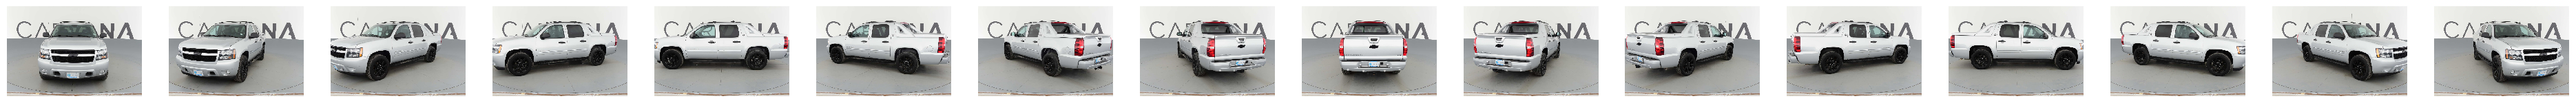

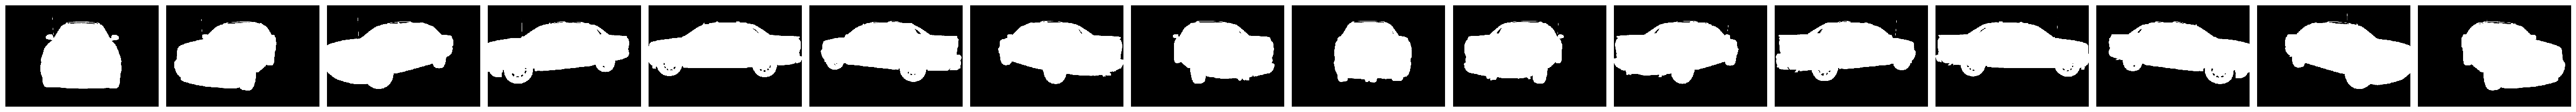

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Show sample image
workDataPath = os.path.join("/content","datasetCarvana","workData")
imgFolderPath = os.path.join(workDataPath, "images")
mskFolderPath = os.path.join(workDataPath,  "masks")

imgID = os.listdir(imgFolderPath)[0]
imgID = imgID[:-7] if not "mask" in imgID else imgID[:-12]
print("imgID: ",imgID)
imgFnms = sorted([x for x in os.listdir(imgFolderPath) if imgID in x])
mskFnms = sorted([x for x in os.listdir(mskFolderPath) if imgID in x])

n_rows = 1; n_cols = 16
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
for i, ax in enumerate(axes.flat):
    # Display image
    imgPath = os.path.join(imgFolderPath,imgFnms[i])
    img = Image.open(imgPath).convert('RGB')
    ax.imshow(img, cmap='gray', interpolation='none')
    # Remove axes
    ax.axis('off')
n_rows = 1; n_cols = 16
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
for i, ax in enumerate(axes.flat):
    # Display image
    imgPath = os.path.join(mskFolderPath,mskFnms[i])
    img = Image.open(imgPath).convert('RGB')
    ax.imshow(img, cmap='gray', interpolation='none')
    # Remove axes
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Cerate multi-class instance segmentation dataset:

We will create a new datsaet for instance segmentation by merging all views in one image and give each view different class e.g. color:

* the views will have different location and rotation in the image
  - to allow the model learns the shape instead of the location
* some view boarders may touch eachother


In [37]:
def extractCar(img,msk):
    carImg, carMsk = None
    return carImg, carMsk

def rotateCar(img,msk):
    angle = random.randint(0, 360)  # Random angle between 0 and 360 degrees
    carImg =  img.rotate(angle)
    carMsk =  msk.rotate(angle)
    return carImg, carMsk



def mergeCarViews(imgLst,mskLst,withTouching=0.10):
    # Determine if images should touch
    width, height = imgLst[0].size

    # New image dimensions
    new_width = width * 4
    new_height = height * 4

    # Create a new blank images
    new_img = Image.new('RGB', (new_width, new_height))
    new_msk = Image.new('RGB', (new_width, new_height))

    for i, img in enumerate(imgLst):
        # Calculate position
        x = (i % 4)  * width
        y = (i // 4) * height
        # Randomly decide if images should touch/overlap
        if random.random() < withTouching:
            overlap = int(min(width, height) * 0.05)  # 5% overlap
            x -= overlap if i % 4 != 0 else 0
            y -= overlap if i // 4 != 0 else 0
        # Paste the image onto the new image
        new_img.paste(img, (x, y))

    for i, img in enumerate(mskLst):
        # Calculate position
        x = (i % 4)  * width
        y = (i // 4) * height
        # Randomly decide if images should touch/overlap
        if random.random() < withTouching:
            overlap = int(min(width, height) * 0.05)  # 5% overlap
            x -= overlap if i % 4 != 0 else 0
            y -= overlap if i // 4 != 0 else 0
        # Paste the image onto the new image
        new_msk.paste(img, (x, y))
    return new_img, new_msk

color_list = [
    (255, 0, 0),     # Red
    (0, 255, 0),     # Green
    (0, 0, 255),     # Blue
    (255, 255, 0),   # Yellow
    (255, 165, 0),   # Orange
    (128, 0, 128),   # Purple
    (255, 192, 203), # Pink
    (0, 255, 255),   # Cyan
    (255, 0, 255),   # Magenta
    (0, 128, 0),     # Dark Green
    (128, 0, 0),     # Maroon
    (0, 128, 128),   # Teal
    (128, 128, 0),   # Olive
    (0, 0, 128),     # Navy
    (128, 128, 128), # Gray
    (255, 105, 180)  # Hot Pink
]

print("done!")


done!


In [56]:
print("Creating instance segmentation dataset............")
# create new folder for instance segmentation:
# process alls source images
# for each car
#    carImages = []
#    for angleview
#       extract the car
#       assign random location
#          shuffle a list from 1-16 then take one by one
#       apply random rotation
#       assign color (viewID)
#       add to carImages
#    combine carImages and maskImages

doCreateMCdataset = 1

if doCreateMCdataset:

    # binary seg paths
    workDataPath  = os.path.join("/content","datasetCarvana","workData")
    imgFolderPath = os.path.join(workDataPath, "images")
    mskFolderPath = os.path.join(workDataPath,  "masks")
    # workDataPath  = os.path.join("/content","datasetCarvana","srcData")
    # imgFolderPath = os.path.join(workDataPath, "train")
    # mskFolderPath = os.path.join(workDataPath, "train_masks")

    # multi-class seg paths
    mcDatasetPath = os.path.join("/content","datasetCarvana","mcData")

    mcImgFolderPath = os.path.join(mcDatasetPath, "images")
    mcMskFolderPath = os.path.join(mcDatasetPath,  "masks")

    folderPaths = [mcDatasetPath, mcImgFolderPath, mskFolderPath]
    for folderPath in folderPaths:
        if not os.path.exists(folderPath):
            os.makedirs(folderPath)

    imgIDs = sorted(os.listdir(imgFolderPath))
    print(imgIDs[0])
    imgIDs = sorted(list(set([x[:-7] if not "mask" in x else x[:-12] for x in imgIDs])))
    print(imgIDs[0])

    viewAngles = ["0"+str(x) if x<10 else str(x)  for x in range(1,17)]
    randomViewAngles =  viewAngles.copy()

    for i, imgID in enumerate(imgIDs):
        clear_output(wait=True); display(f"{i+1}/{len(imgIDs)} : {imgID}")
        carImages = []; carMasks = []
        random.shuffle(randomViewAngles)
        for a in randomViewAngles:
            # imgPath = os.path.join(imgFolderPath,imgID+"_"+a+".jpg")
            # mskPath = os.path.join(mskFolderPath,imgID+"_"+a+"_mask.gif")
            imgPath = os.path.join(imgFolderPath,imgID+"_"+a+".png")
            mskPath = os.path.join(mskFolderPath,imgID+"_"+a+".png")

            img = Image.open(imgPath)
            msk = Image.open(mskPath)
            img = img.convert('RGB')
            msk = msk.convert('RGB')
            #resize
            img = img.resize((480,320))
            msk = msk.resize((480,320))
            img,msk = rotateCar(img,msk)
            # change mask class
            mskA = np.array(msk)
            mskA[mskA >= 128] = 255; mskA[mskA < 128] = 0
            colorID = int(a)-1
            wColor = np.any(mskA == 255, axis=-1)

            # Convert grayscale mask to RGB
            # Assign the color to the mask where condition is met
            # Ensure that the shape of the array is compatible for the assignment
            if wColor.ndim == mskA.ndim - 1:
                mskA[wColor] = color_list[colorID]
            elif wColor.shape == mskA.shape:
                mskA[wColor, :] = color_list[colorID]
            msk = Image.fromarray(mskA)
            carImages.append(img);
            carMasks.append(msk);
        nImg,nMsk = mergeCarViews(carImages,carMasks,withTouching=0.10)
        nImgPath  = os.path.join(mcImgFolderPath,imgID+".png")
        nMskPath  = os.path.join(mcMskFolderPath,imgID+".png")
        nImg.save(nImgPath)
        nMsk.save(nMskPath)



'318/318 : fff9b3a5373f'

### Show sample images

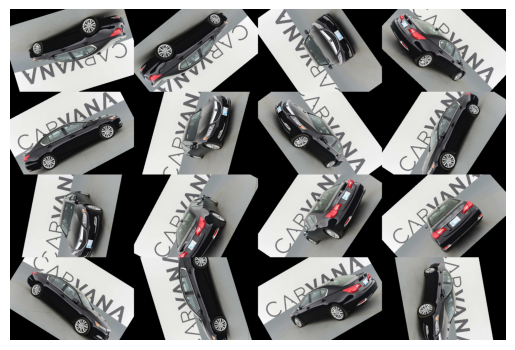

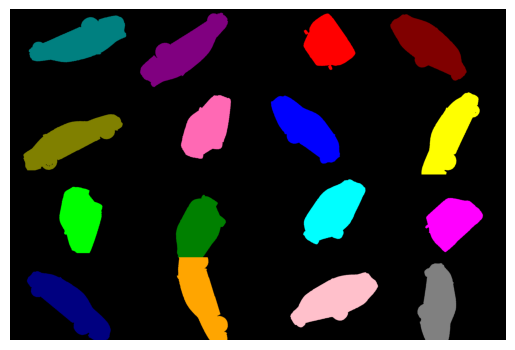

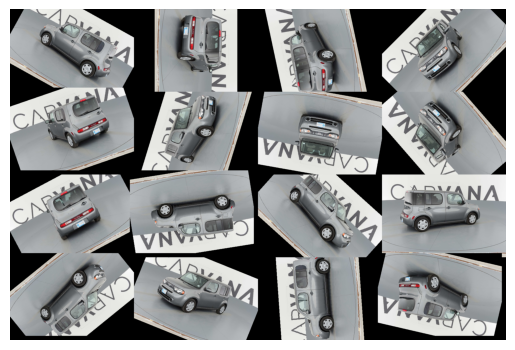

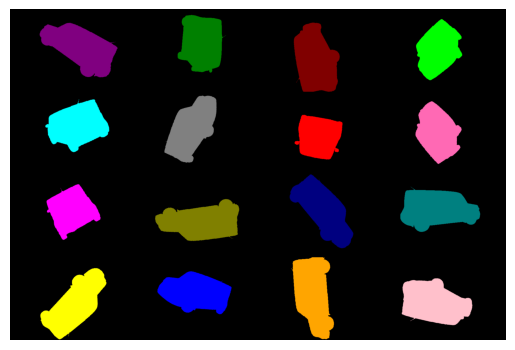

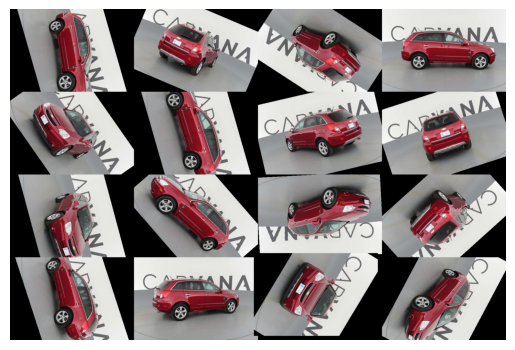

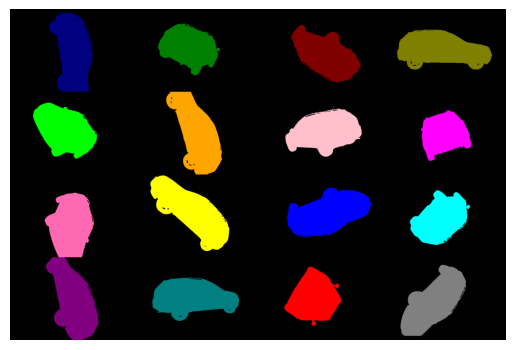

In [57]:
fnms = sorted(os.listdir(mcImgFolderPath))[:3]
for fnm in fnms:
    img = Image.open(os.path.join(mcImgFolderPath,fnm))
    msk = Image.open(os.path.join(mcMskFolderPath,fnm))

    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

    plt.imshow(msk)
    plt.axis('off')  # Hide the axis
    plt.show()


### Create a compressed zip file for download


In [59]:
# Example usage
folder_to_zip   = "/content/datasetCarvana/mcData/"  # Replace with your folder path
output_zip_file = "/content/dataMC.zip"  # Replace with your desired zip file path
zipFolder(folder_to_zip, output_zip_file)
print("done!")